<a href="https://colab.research.google.com/github/parkminhyung/R-code-for-finance/blob/master/world_indices_corr_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install required packages

In [2]:
install.packages('pacman')
pacman::p_load("networkD3","dplyr","igraph","quantmod")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘htmlwidgets’, ‘igraph’



networkD3 installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’



quantmod installed



Build world data frame

In [3]:
world_data = data.frame(
  'Name' = c('SNP500','NASDAQ','Tokyo','Shanghai',
             'HongKong','London','EuronextParis',
             'Frankfurt','Toronto','KOSPI','AustralianSecurities',
             'Bombay','BMFBovespa','Moscow','Johannesburg',
             'Singapore','BolsadeMadrid','Taiwan',
             'Swiss','BursaMalaysia','ofThailand',
             'Indonesia','Saudi','TelAviv',
             'BuenosAires'),

  'Ticker' = c('^GSPC', '^IXIC', '^N225', '000001.SS', '0388.HK', '^FTSE', '^FCHI',
               '^GDAXI', '^GSPTSE', '^KS11', '^AXJO', '^BSESN', '^BVSP', 'IMOEX.ME',
               'JSE.JO', '^STI', 'IGBM.MA', '0050.TW', '^SSMI', '^KLSE', '^SET.BK',
               '^JKSE', '^TASI.SR', 'TASE.TA', '^MERV'),

  'Continent' = c('North America', 'North America', 'Asia', 'Asia', 'Asia', 'Europe',
                  'Europe', 'Europe', 'North America', 'Asia', 'Oceania', 'Asia', 'South America',
                  'Europe', 'Africa', 'Asia', 'Europe', 'Asia', 'Europe', 'Asia', 'Asia',
                  'Asia', 'Asia', 'Asia', 'South America')
)
world_data

Name,Ticker,Continent
<chr>,<chr>,<chr>
SNP500,^GSPC,North America
NASDAQ,^IXIC,North America
Tokyo,^N225,Asia
Shanghai,000001.SS,Asia
HongKong,0388.HK,Asia
London,^FTSE,Europe
EuronextParis,^FCHI,Europe
Frankfurt,^GDAXI,Europe
Toronto,^GSPTSE,North America


Download indicies data and build correlation dataframe

In [4]:
data = data.frame()

start_date = '2020-01-01'; end_date = Sys.Date()

for (i in 1:nrow(world_data)) {
  try({
    data = getSymbols(
      world_data$Ticker[i],
      from = start_date,
      to = end_date,
      auto.assign = FALSE
    ) %>% Cl() %>% log() %>% diff() %>%
      setNames(world_data$Name[i]) %>%
      cbind(.,data)
  })
}

data[is.na(data)]=0

cor_data = cor(data)

cor_data

Warning message:
“^FTSE contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“^BSESN contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“IMOEX.ME contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“^STI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


Error in getSymbols.yahoo(Symbols = "IGBM.MA", env = <environment>, verbose = FALSE,  : 
  Unable to import “IGBM.MA”.
attempt to set an attribute on NULL


Warning message:
“^SSMI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“^SET.BK contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“^TASI.SR contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“^MERV contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


,BuenosAires,TelAviv,Saudi,Indonesia,ofThailand,BursaMalaysia,Swiss,Taiwan,Singapore,Johannesburg,⋯,KOSPI,Toronto,Frankfurt,EuronextParis,London,HongKong,Shanghai,Tokyo,NASDAQ,SNP500
BuenosAires,1.000000000,0.01699949,0.05580115,-0.002253505,0.052450609,0.007250794,0.1076565,0.04300189,0.07057522,0.02773374,⋯,0.04185672,0.1126602,0.1330289,0.1196532,0.1276370,-0.01619600,-0.009549017,0.03340568,0.07873477,0.09776622
TelAviv,0.016999486,1.00000000,0.15882795,0.147965235,0.166664821,0.117316975,0.2326941,0.14311565,0.10716377,0.03240662,⋯,0.17321751,0.2637976,0.3081701,0.2871915,0.2825789,0.06937595,0.038490933,0.10344042,0.21829230,0.25754639
Saudi,0.055801150,0.15882795,1.00000000,0.231145532,0.327539334,0.226255795,0.2513468,0.15533706,0.22582939,0.14597311,⋯,0.19503178,0.3071799,0.2473054,0.2657519,0.2821038,0.11700797,0.149559963,0.17850105,0.19330451,0.24104832
Indonesia,-0.002253505,0.14796524,0.23114553,1.000000000,0.425827482,0.395218696,0.2246414,0.38128985,0.41012317,0.10411179,⋯,0.43066603,0.2895305,0.2585305,0.2866228,0.2723413,0.22228435,0.237149744,0.27226666,0.20337870,0.26027484
ofThailand,0.052450609,0.16666482,0.32753933,0.425827482,1.000000000,0.477297203,0.4099580,0.41031298,0.51672022,0.18654792,⋯,0.48448130,0.4320977,0.4576588,0.4849523,0.4648714,0.28630651,0.321407493,0.33274593,0.24689253,0.30464017
BursaMalaysia,0.007250794,0.11731697,0.22625579,0.395218696,0.477297203,1.000000000,0.1927978,0.40578504,0.45111175,0.11666960,⋯,0.48422721,0.1946699,0.2756641,0.2816080,0.2432456,0.22805464,0.259785014,0.35141115,0.10503028,0.13522472
Swiss,0.107656528,0.23269413,0.25134684,0.224641428,0.409958009,0.192797804,1.0000000,0.22176287,0.32116056,0.20295061,⋯,0.28198986,0.6368445,0.8096773,0.8129525,0.7887280,0.16979087,0.173581923,0.30454153,0.47973997,0.55356857
Taiwan,0.043001886,0.14311565,0.15533706,0.381289849,0.410312977,0.405785043,0.2217629,1.00000000,0.48370175,0.14368660,⋯,0.67058053,0.2503004,0.2939628,0.2980408,0.2886098,0.39933122,0.371620539,0.53180204,0.15586677,0.18262169
Singapore,0.070575215,0.10716377,0.22582939,0.410123174,0.516720222,0.451111746,0.3211606,0.48370175,1.00000000,0.12683162,⋯,0.60421216,0.2989094,0.3828416,0.3971986,0.4021771,0.35311406,0.328868646,0.45234770,0.12393894,0.18853026
Johannesburg,0.027733741,0.03240662,0.14597311,0.104111789,0.186547919,0.116669600,0.2029506,0.14368660,0.12683162,1.00000000,⋯,0.15548706,0.1915457,0.2765898,0.2727530,0.2439741,0.08474535,0.068508314,0.12563371,0.17518766,0.18846618


Build edge and node dataframe using correlation values among indices

In [5]:
edges_df = cor_data %>% as.matrix() %>%
  graph_from_adjacency_matrix(.,mode = "undirected", weighted = TRUE, diag = FALSE) %>%
  get.edgelist(.,names= TRUE) %>%
  as.data.frame() %>%
  mutate(value = cor_data[as.matrix(t(apply(., 1, sort)))])

nodes_df = data.frame(id = unique(c(edges_df[,1], edges_df[,2])), stringsAsFactors = FALSE) %>%
  mutate(index = 0:(nrow(.)-1)) %>%
  mutate(group = setNames(world_data$Continent, world_data$Name)[.$id])

edges_df = edges_df %>%
  mutate(from = setNames(nodes_df$index, nodes_df$id)[edges_df[,1]]) %>%
  mutate(to = setNames(nodes_df$index, nodes_df$id)[edges_df[,2]])


Make 3D correlation network plot

In [6]:

forceNetwork(
  Links = edges_df,
  Nodes = nodes_df,
  Source = "from",
  Target = "to",
  Value = "value",
  NodeID = "id",
  Group = "group",
  fontSize = 14,
  fontFamily = "Arial Black",
  zoom = TRUE,
  legend = TRUE,
  opacity = 0.8,
  bounded = TRUE,
  opacityNoHover = TRUE,
  linkDistance = 450,
  linkWidth = JS("function(d) { return Math.abs(d.value) * 5; }"),
)

HTML widgets cannot be represented in plain text (need html)

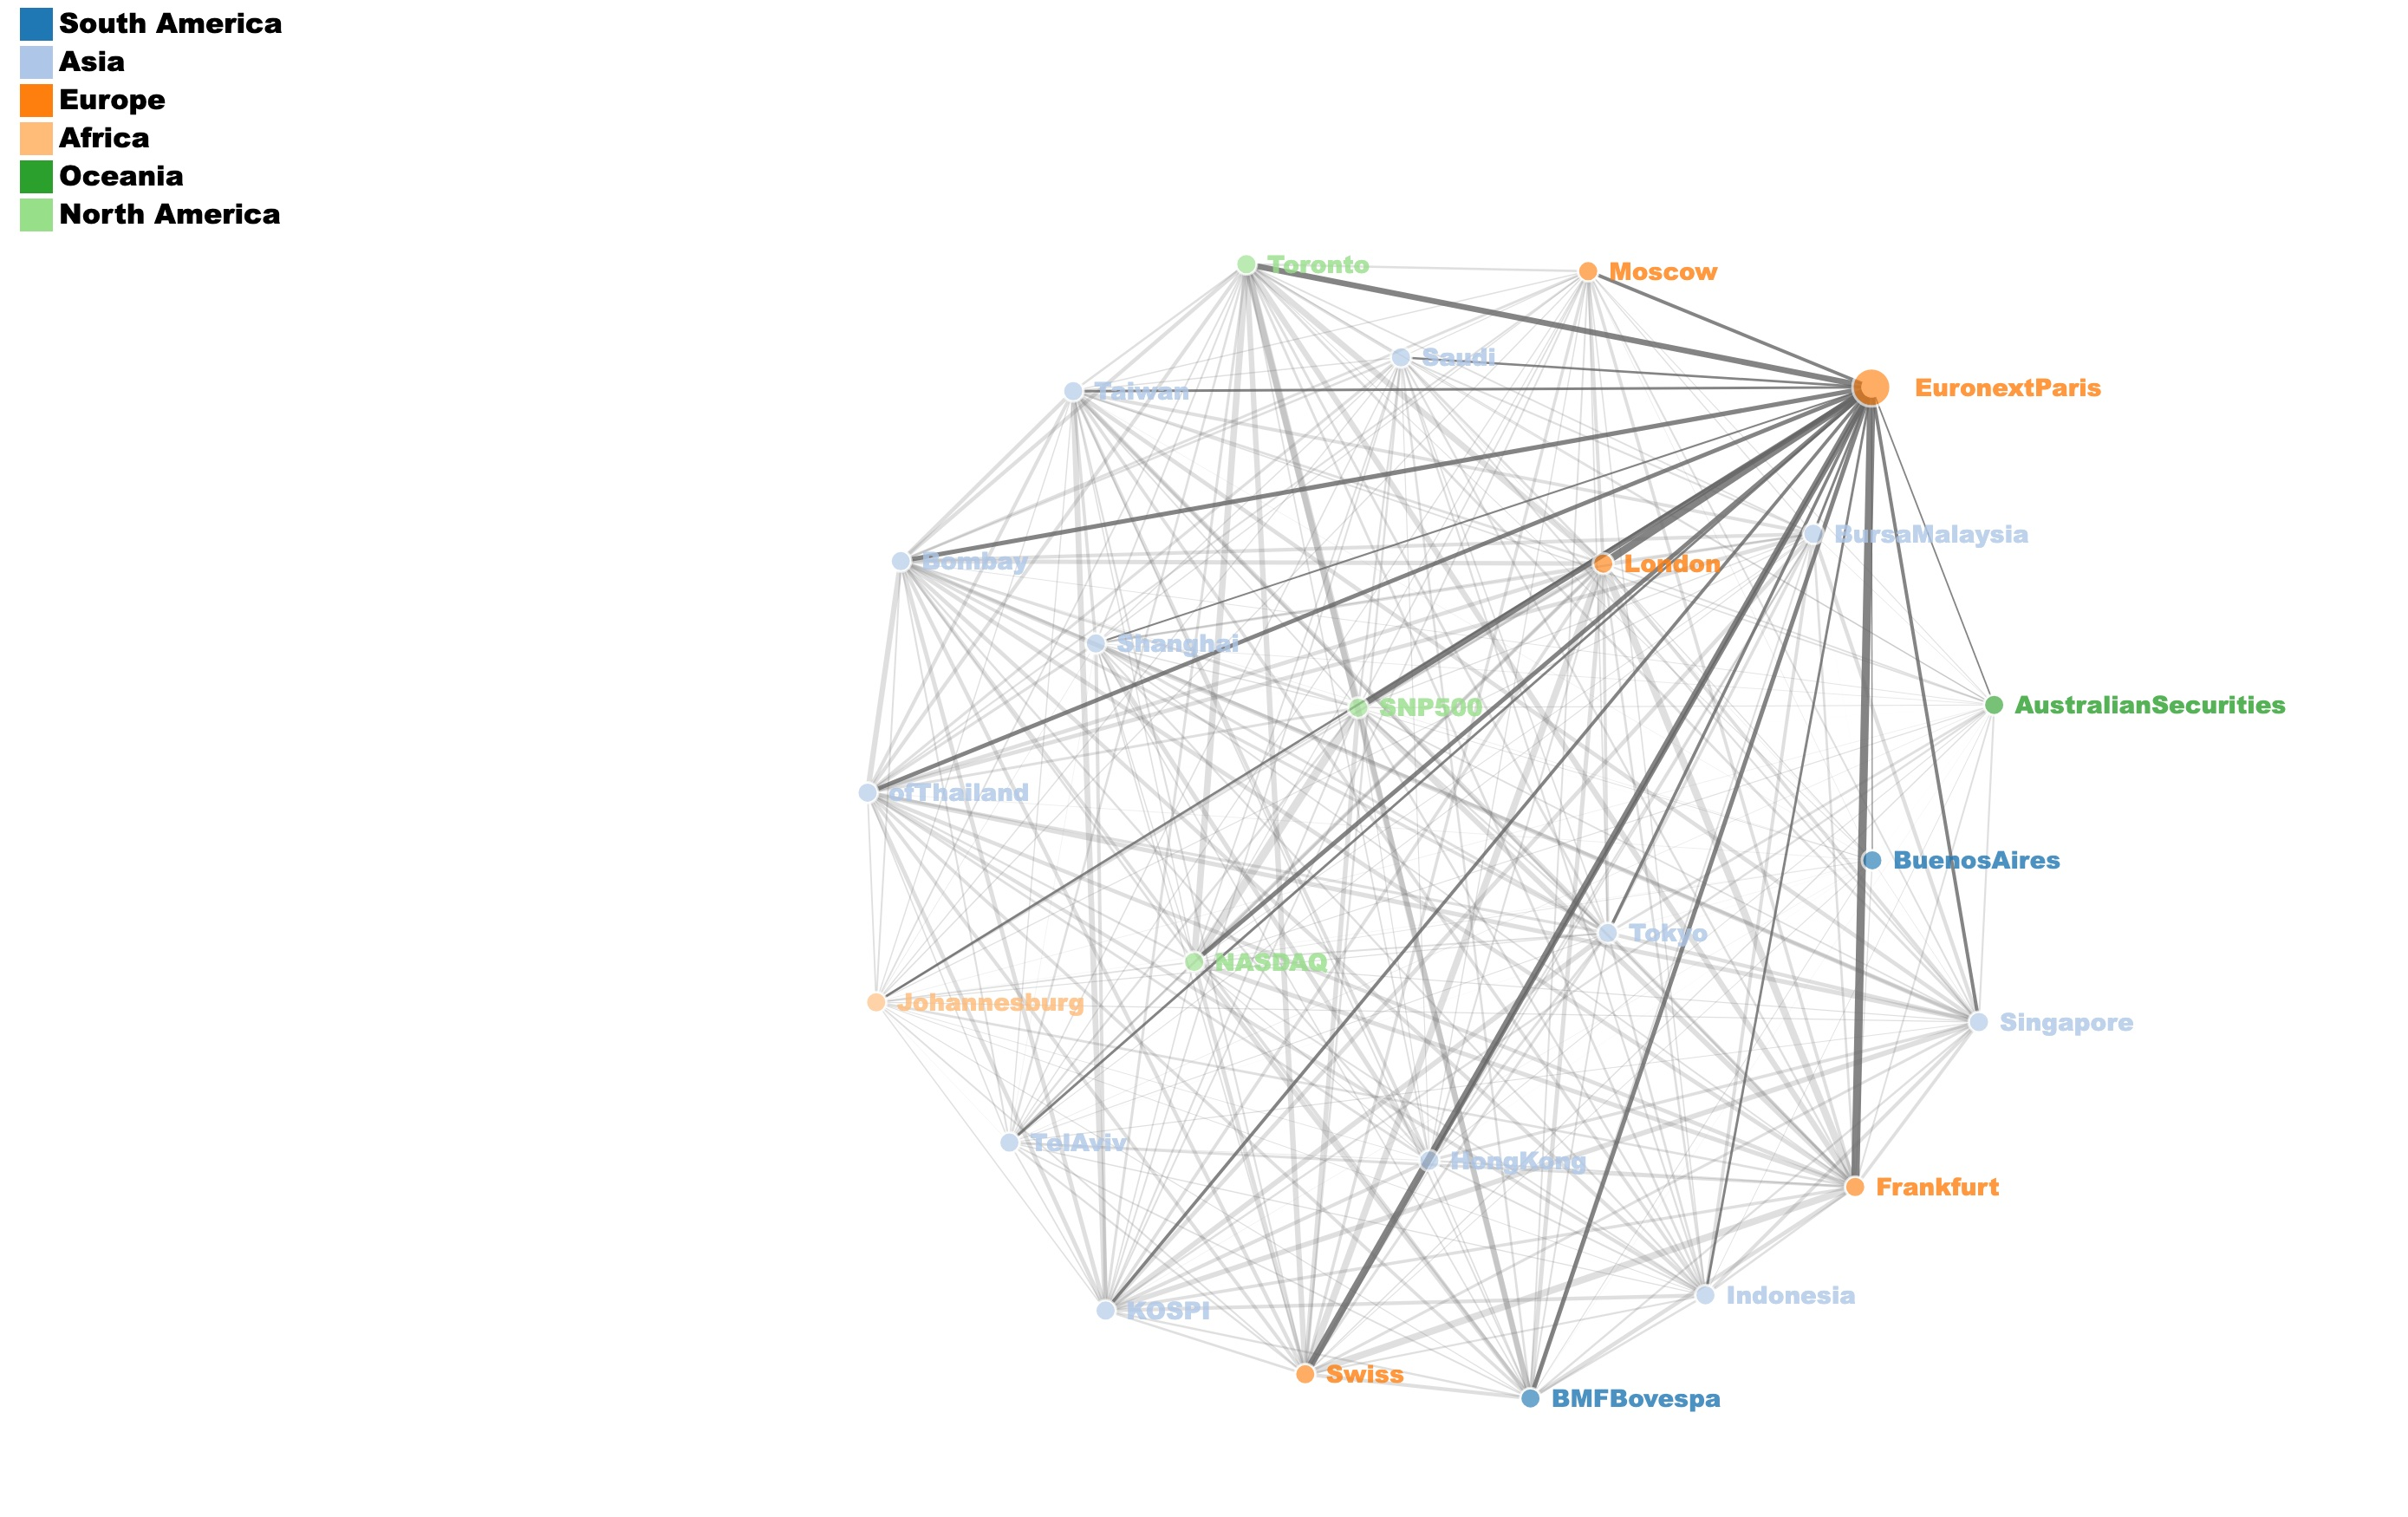